In [1]:
import numpy as np
import sys
import os
import traceback
import itertools
import cPickle as pickle
import time

import scipy.weave as weave
from scipy.weave import converters

import matplotlib.pylab as plt
%matplotlib inline

from sigvisa.infer.propose_hough import visualize_hough_array, normalize_global, HoughConfig, get_uatemplates, global_hough

In [2]:
with open("/home/dmoore/python/sigvisa/logs/mcmc/01192/step_001337/pickle.sg", "rb") as f:
    sg = pickle.load(f)
    
sg.uatemplate_rate = sg.event_rate * 3

In [3]:

print float(len(sg.uatemplates.keys())) / ( (sg.end_time - sg.start_time) * len(sg.station_waves) )


0.00279790660225


In [7]:
region = sg.inference_region
stime = region.stime
etime = region.etime
global_bin_width=1.0
phases=("Pg", "Lg", "Sn", "Pn")
depthbin_bounds = [0,10,50,150,400,700]
top_lat = region.top_lat
bottom_lat = region.bottom_lat
left_lon = region.left_lon
right_lon = region.right_lon

event_rate = sg.event_rate
uatemplate_rate = 1e-3

print event_rate
print uatemplate_rate

hc = HoughConfig(stime, etime-stime, bin_width_deg=global_bin_width,
                 phases=phases, depthbin_bounds=depthbin_bounds, time_tick_s = 20.0,
                 mbbins=12,
                 top_lat=top_lat, bottom_lat=bottom_lat,
                 left_lon=left_lon, right_lon=right_lon,
                 uatemplate_rate=uatemplate_rate,
                 global_event_rate=sg.event_rate)

1.71232876712e-06
0.001


In [8]:
uatemplates_by_sta = get_uatemplates(sg)


global_array,debug, nll = global_hough(sg, hc, uatemplates_by_sta, save_debug=False)
global_dist_oneevent = normalize_global(global_array.copy(), nll, one_event_semantics=True, hc=hc)
global_dist = normalize_global(global_array.copy(), nll, one_event_semantics=False, hc=hc)



ANMO
PD31
PFO
TX01
KDAK
YKR8
ULM
NEW
IL31
YBH
ELK
NV01
global hough: init 0.001906 stahough 9.210411 adj 0.033541 total 9.245912


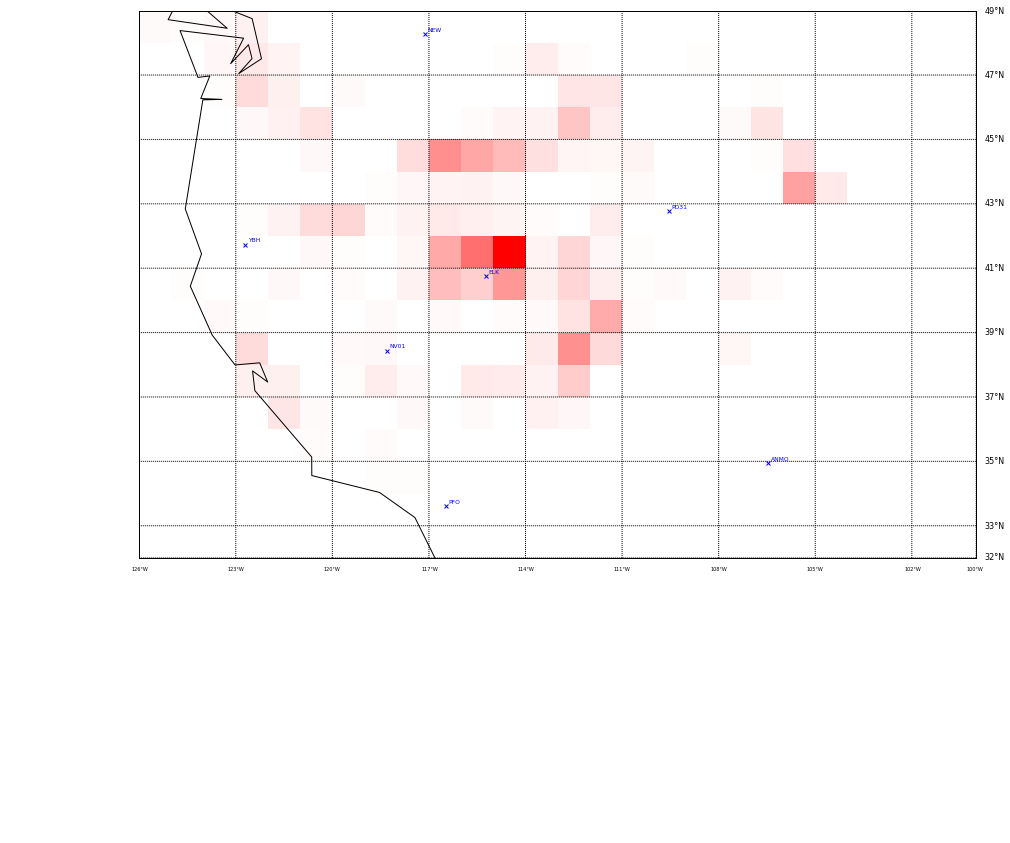

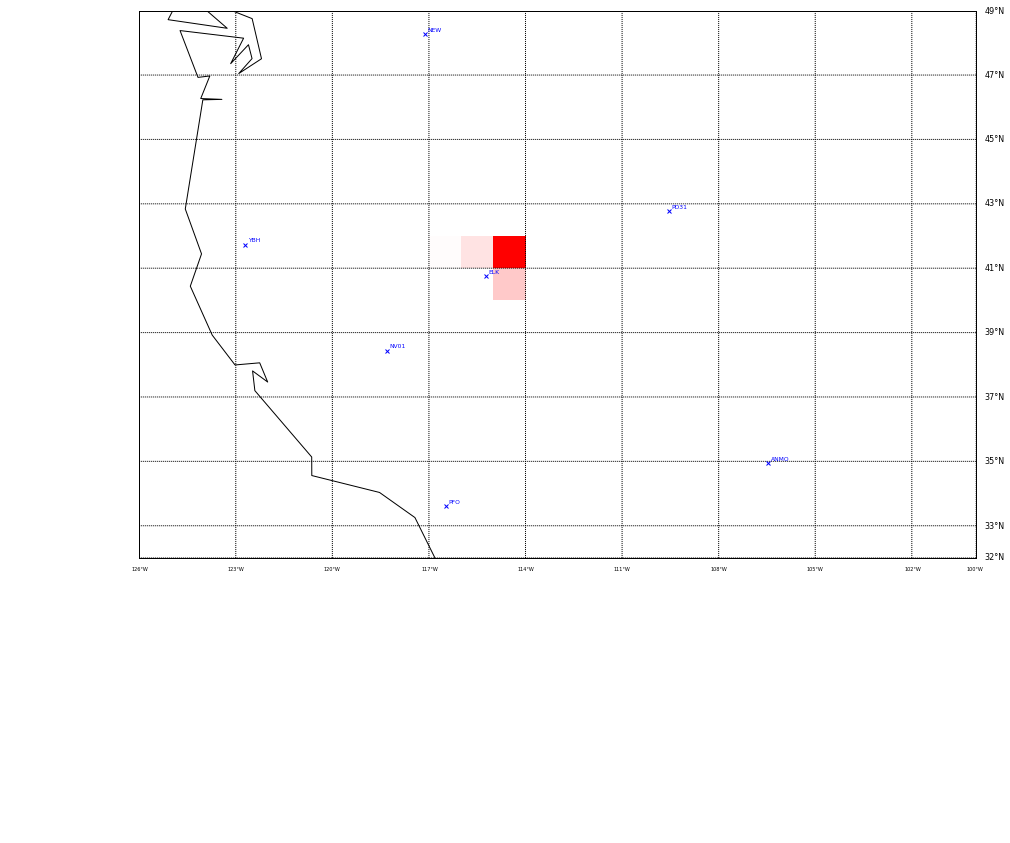

In [6]:
f = plt.figure(figsize=(15, 15))
ax = f.add_subplot(111)
visualize_hough_array(global_dist, sg.station_waves.keys(), ax=ax, region=sg.inference_region)

f = plt.figure(figsize=(15, 15))
ax = f.add_subplot(111)
visualize_hough_array(global_dist_oneevent, sg.station_waves.keys(), ax=ax, region=sg.inference_region)

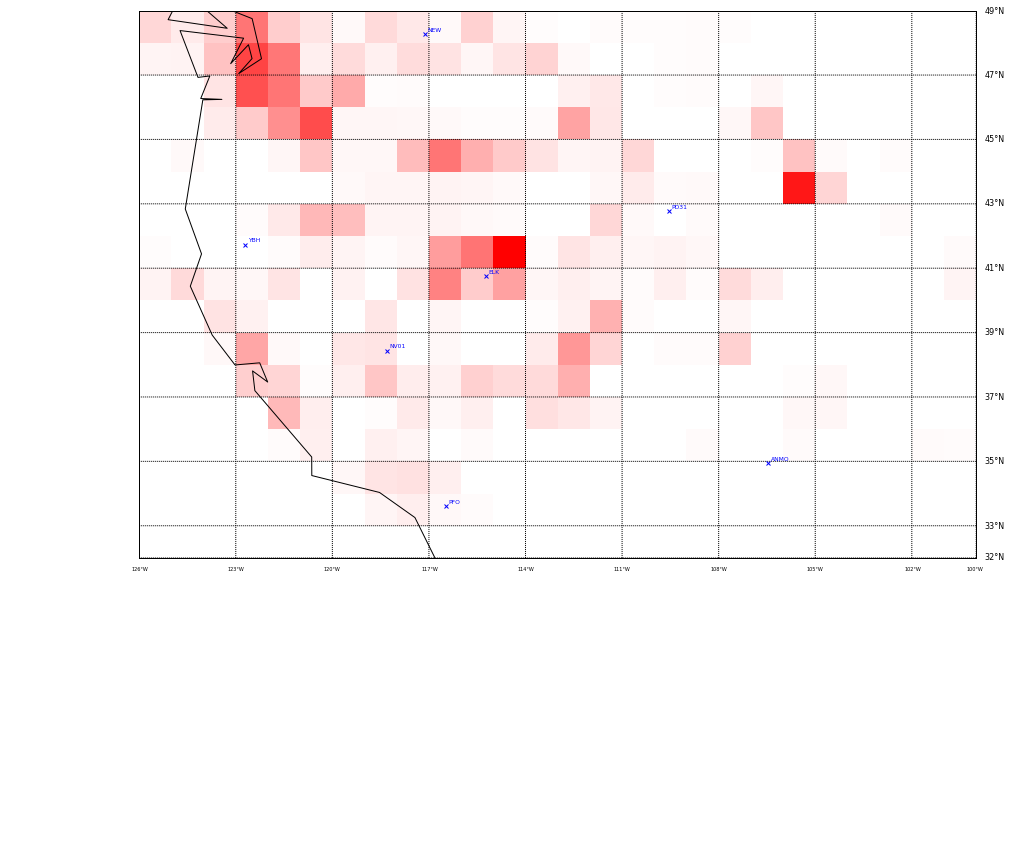

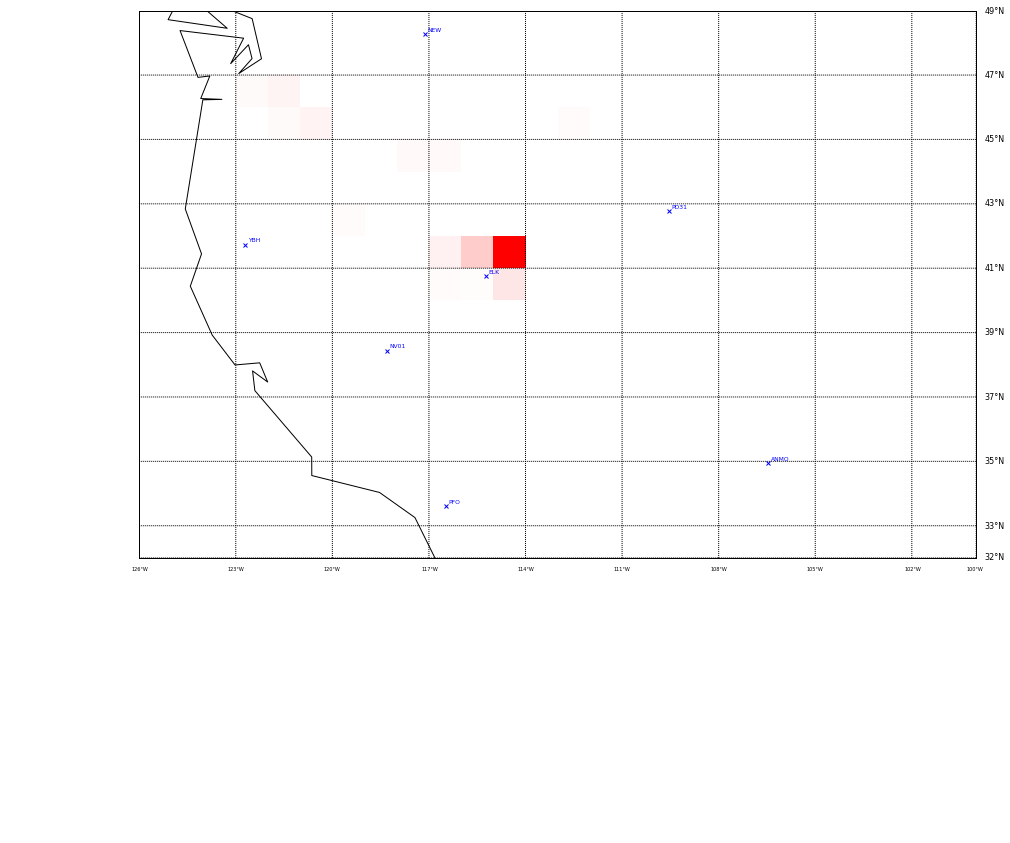

In [9]:
f = plt.figure(figsize=(15, 15))
ax = f.add_subplot(111)
visualize_hough_array(global_dist, sg.station_waves.keys(), ax=ax, region=sg.inference_region)

f = plt.figure(figsize=(15, 15))
ax = f.add_subplot(111)
visualize_hough_array(global_dist_oneevent, sg.station_waves.keys(), ax=ax, region=sg.inference_region)